In [1]:
%matplotlib notebook

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pandas as pd
import numpy as np
import copy

In [16]:
#load the combined data for years 1980 to 2020
#This data does not have the country information
file_path="output_data/earthquake_data_1980-2020.csv"
quake_data_complete=pd.read_csv(file_path)
len(quake_data_complete)

67587

In [17]:
#This data contains all magnitudes from the range of year 1980 to 1990
quakes_8489 = quake_data_complete.loc[(quake_data_complete['Year']>=1984) &
                                   (quake_data_complete['Year']<=1989)
                                      ]
print(len(quakes_8489))
#This data contains all magnitudes from the range of year 1980 to 1990
quakes_0005 = quake_data_complete.loc[(quake_data_complete['Year']>=2000) &
                                   (quake_data_complete['Year']<=2005)
                                      ]
print(len(quakes_0005))

9970
9036


In [61]:
#Add the country info from module reverse_geocoder
quakes_all_8489= copy.deepcopy(quakes_8489)
quakes_all_8489.loc[:,'Country'] = quakes_all_8489.apply(lambda x: rg.search((x['Lat'], x['Lng']))[0]['cc'], axis=1)  
#Add the country info from module reverse_geocoder
quakes_all_0005= copy.deepcopy(quakes_0005)
quakes_all_0005.loc[:,'Country'] = quakes_all_0005.apply(lambda x: rg.search((x['Lat'], x['Lng']))[0]['cc'], axis=1) 

In [19]:
#quakes_all_8489
#quakes_all_8489.to_csv("output_data/quakes_all_8489.csv", index=False)

In [8]:
quakes_all_0005.to_csv("output_data/quakes_all_0005.csv")

In [20]:
lfile_path="output_data/large_quakes_all.csv"
mfile_path="output_data/medium_quakes_all.csv"
quakes_major=pd.read_csv(lfile_path)
quakes_medium=pd.read_csv(mfile_path)

del us_quakes_major['Lat']
del us_quakes_major['Lng']
del us_quakes_major['Day']
us_quakes_major.set_index('Year')
len(us_quakes_major)

26

In [21]:
#Pick columns required to plot
columns = ['Year', 'Mag']
#From entire dataframe isolate US and reduce columns
usa_quakes_major = quakes_major.loc[quakes_major["Country"] == "US", columns]
usa_quakes_medium = quakes_medium.loc[quakes_medium["Country"] == "US", columns]
#groupby year and get average
usa_quakes_major=usa_quakes_major.groupby('Year').mean()
usa_quakes_medium=usa_quakes_medium.groupby('Year').mean()


<IPython.core.display.Javascript object>


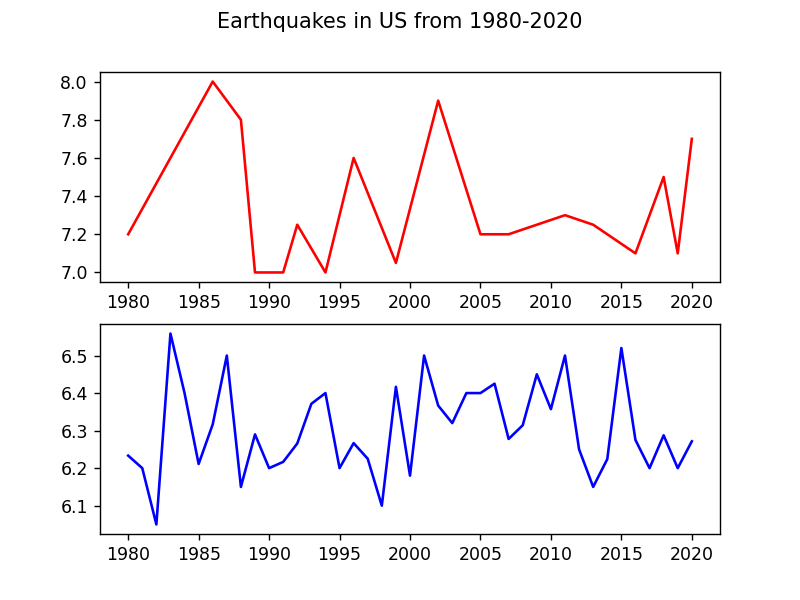

In [62]:
fig,(axs1, axs2) = plt.subplots(2)
fig.suptitle('Earthquakes in US from 1980-2020')
#fig.set_size_inches(9,3)
major, = axs1.plot(usa_quakes_major.index, usa_quakes_major.values, color="red", label="Major quakes")
medium, =axs2.plot(usa_quakes_medium.index, usa_quakes_medium.values, color="blue", label="Medium quakes")


In [29]:
# Add labels to X and Y axes :: Add title
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.grid()

In [27]:
plt.legend()
plt.show()

In [22]:
quakes_all_8489=pd.read_csv("output_data/quakes_all_8489.csv")
quakes_all_0005=pd.read_csv("output_data/quakes_all_0005.csv")


In [52]:
quakes_all_8489['Date']=pd.to_datetime(quakes_all_8489['Time']).dt.date
quakes_all_0005['Date']=pd.to_datetime(quakes_all_0005['Time']).dt.date
quakes_all_8489.head()

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Country,Date
0,-37.431,77.627,10.0,5.2,416,Mid-Indian Ridge,1984-01-01 00:46:34.450,1,1,1984,TF,1984-01-01
1,-2.601,141.597,33.0,5.5,465,"near the north coast of New Guinea, Papua New ...",1984-01-01 01:55:01.370,1,1,1984,PG,1984-01-01
2,41.823,142.137,75.0,5.1,400,"Hokkaido, Japan region",1984-01-01 02:22:43.630,1,1,1984,JP,1984-01-01
3,0.950,126.068,65.1,5.0,385,Molucca Sea,1984-01-01 06:00:23.640,1,1,1984,ID,1984-01-01
4,33.683,136.894,368.1,7.2,798,"near the south coast of western Honshu, Japan",1984-01-01 09:03:38.850,1,1,1984,JP,1984-01-01


<IPython.core.display.Javascript object>


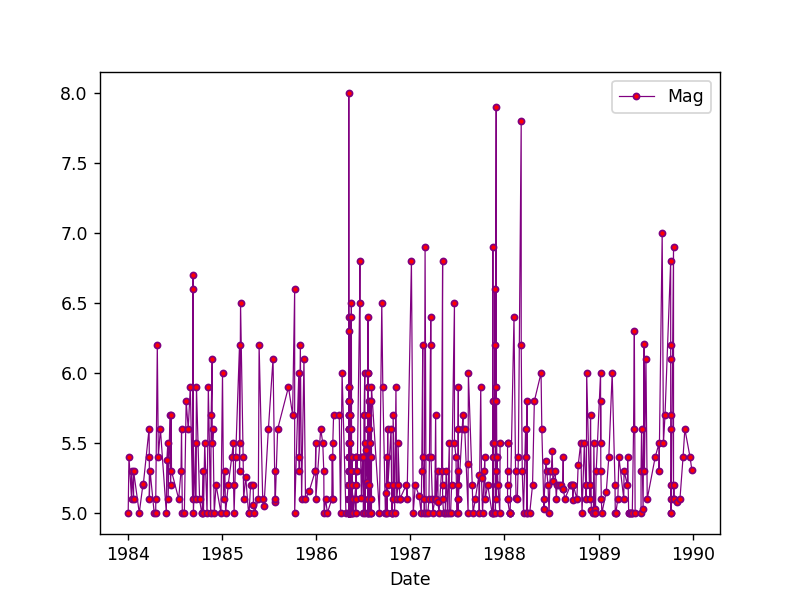

<AxesSubplot:xlabel='Date'>

In [42]:
columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
quakes_all_8489.loc[quakes_all_8489["Country"] == "US",
                    columns].set_index('Date').plot(marker='.',
                                                    ms = 7, mfc = 'r',
                                                    linewidth=0.7, 
                                                    color='purple')


<IPython.core.display.Javascript object>


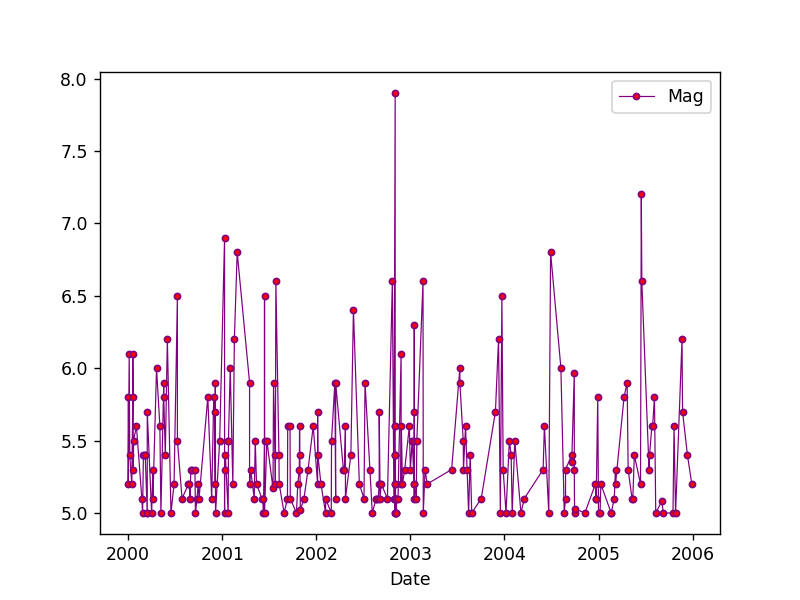

<AxesSubplot:xlabel='Date'>

In [60]:
# columns = ['Date', 'Mag']
# #From entire dataframe isolate US and reduce columns
# us_quakes_0005 = quakes_all_0005.loc[quakes_all_0005["Country"] == "US", columns]
# us_quakes_0005.set_index('Date').plot(marker='.', ms = 7, mfc = 'r',linewidth=0.7, color='purple')

columns = ['Date', 'Mag']
#From entire dataframe isolate US and reduce columns
quakes_all_0005.loc[quakes_all_0005["Country"] == "US",
                    columns].set_index('Date').plot(marker='.',
                                                    ms = 7, mfc = 'r',
                                                    linewidth=0.7, 
                                                    color='purple')
